### EP0302: Programming for Data Science
+ Name: Nicholas Bay
+ Adm No.: P2002257
---
#### Title: Research and Development Expenditure
#### Objective: What are the main contributors to the total R&D expenditure? How are the variants co-related to the total R&D expenditure?
#### URLs of all datasets
1. [Total R&D expenditure](https://data.gov.sg/dataset/total-research-and-development-expenditure)
2. [R&D Expenditure by Sector, Annual](https://data.gov.sg/dataset/public-sector-research-and-development-expenditure)
3. [R&D Expenditure by Type of Cost](https://data.gov.sg/dataset/research-and-development-expenditure-by-type-of-cost)
4. [R&D Manpower Full Time Equivalence by Sector](https://data.gov.sg/dataset/research-and-development-manpower-by-sector)

#### Libraries & Settings
---

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
pd.set_option('precision',0)
year = np.array([1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
sector = ['Private','Public','All']
sector2 = ['Government Sector','Institutes of Higher Learning','Private Sector','Public Research Institutes','All']
type_of_expenditure = ['Capital Expenditure','Manpower Expenditure','Other Operating Expenditure','All']
type_of_rnd_manpower = ['Bachelors','Masters','Non Degree','PhD','Post Graduate','All']

### R&D Total Expenditure

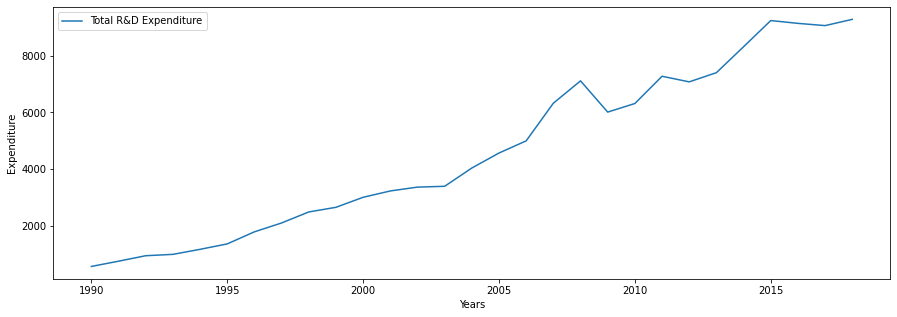

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
rnd_expenditure,572,757,950,998,1175,1367,1792,2105,2492,2656,...,6013,6315,7276,7078,7402,8317,9239,9140,9062,9282


In [54]:
df = pd.read_csv('ca2_data/total-research-and-development-expenditure-annual.csv',sep=',')
table = pd.pivot_table(data=df,columns='year',values='rnd_expenditure')
dataset = np.array(table).flatten()
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(year,dataset,label='Total R&D Expenditure')
ax.set_xlabel('Years');ax.set_ylabel('Expenditure');ax.legend(loc='upper left')
plt.show()
table

> `(Line) & Pivot`
> + Using Pivot Table, statistics shows the R&D expenditure throughout the years from 1990 to 2018
> + Line graph is used to illustrate that dataset
> + This is the R&D trend of the last 28 years. It is an increasing upward trend line
> + However if we zoom into certain years, there is a drop comparing year on year eg. 2007 vs 2008 and 2008 vs 2009
> + Why? Based on  national survey conduced by National Research Foundation in MM YYYY, the increase mainly is coming from Manufacturing R&D, particularly Electronic industry, but there is a spike in year 2008 where total expenditure in private sector spike up  and a sudden drop in total R&D cost in year 2009. From xx research dated mmmyy, the upcoming events shock the whole world, but it was expected though. End of 2007 to 2009, financial crisis began. When the bubble burse, the financial instituations were left holding all the owrthless investments in their subprime mortgaged. The Great Recession cost many their jobs, their savigns and their home. In order to reduce cost as a whole, the private entities eg Pfier, GST, mainly healtcare sector start with R&D department to drastically cut expenses.

### R&D Expenditure by Sector

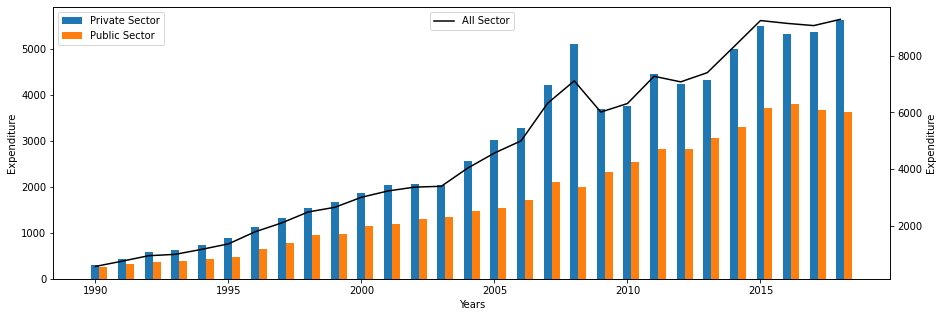

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
sector,,,,,,,,,,,,,,,,,,,,,
Private,310,442,578,619,736,881,1133,1315,1536,1671,...,3774,4456,4249,4333,5007,5512,5341,5386,5638,82829
Public,262,315,372,379,439,485,659,790,956,985,...,2541,2819,2829,3069,3310,3728,3799,3675,3643,51214
All,572,757,950,998,1175,1367,1792,2105,2492,2656,...,6315,7276,7078,7402,8317,9239,9140,9062,9282,134043


In [55]:
df = pd.read_csv('ca2_data/research-and-development-expenditure-by-sector-annual.csv',sep=',')
table = pd.pivot_table(data=df,index='sector',columns='year',values='rnd_expenditure',margins=True,aggfunc='sum')
dataset = np.array(table)[:,:-1]
fig,ax = plt.subplots(figsize=(15,5));secax = ax.twinx()
ax.bar(year,dataset[0],0.3,label='Private Sector')
ax.bar(year+0.3,dataset[1],0.3,label='Public Sector')
secax.plot(year,dataset[2],color='black',label='All Sector')
ax.set_xlabel('Years');ax.set_ylabel('Expenditure');secax.set_ylabel('Expenditure');ax.legend(loc='upper left');secax.legend(loc='upper center')
plt.show()
table

> `(Line, Bar) & Pivot`
> + Using Pivot Table, statistics shows the R&D expenditure throughout the years from 1990 to 2018 with types of sectors seperated into **Private** and **Public**
> + Bar graph is used to illustrate that dataset
> + Expenditure on R&D is one of the most widely used measures of innovation inputs. In other words, R&D expenditure is correlated with the economy Gross Domestic Product (GDP)
> + R&D Intentsity (expenditure as a percentage of GDP) is used as an indicator of an economy's relative degtee of investment in generating new knowledge, mainly in the manufacturing R&D particularly in the electronic industry 
> + We can see from 2006 to 2008, the upward trend is steeper which indicates that the economy is in a more aggressive behaviour to generate new knowledge especially in the private sector as the blue bar is showing a steeper upward slope.
> + However, during the great recession in the 2000s, Singapore was the first country to take the hit in July 2008, and we can see the effect on the R&D expenditure that private companies were unable to sustain the fall, generally the reduction in cost was put in place. R&D expenditure is the very first to take the cut  and its seen in the statistic there is a short drop in total ependiture which is caused by the private sector as the blue bar

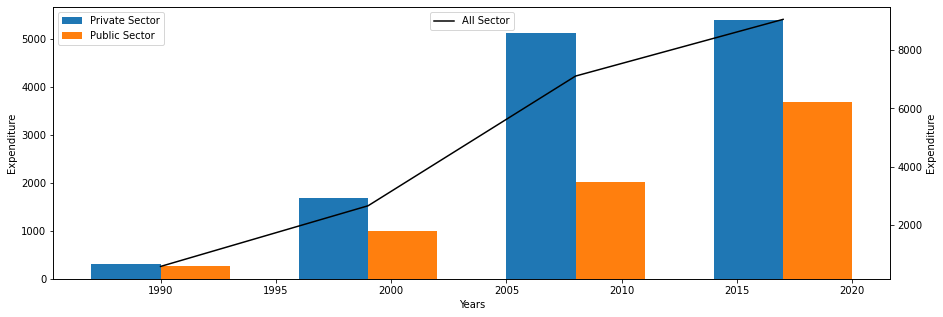

,1990,1999,2008,2017
Private,310,1671,5105,5386
Public,262,985,2008,3675
All,572,2656,7114,9062


In [56]:
dataset = dataset[:,::9]
table1 = pd.DataFrame(dataset,columns=year[::9],index=sector)
fig,ax = plt.subplots(figsize=(15,5));secax = ax.twinx()
ax.bar(year[::9]-1.5,dataset[0],3,label='Private Sector')
ax.bar(year[::9]+1.5,dataset[1],3,label='Public Sector')
secax.plot(year[::9],dataset[2],color='black',label='All Sector')
ax.set_xlabel('Years');ax.set_ylabel('Expenditure');secax.set_ylabel('Expenditure');ax.legend(loc='upper left');secax.legend(loc='upper center')
plt.show()
table1

> `(Line, Bar) & Pivot`
> + Using Pivot Table, statistics shows the R&D expenditure throughout the years from 1990 to 2018 with types of sectors seperated into **Private** and **Public** with a ten year interval (**1990**, **1999**, **2008**, **2017**)
> + Bar graph is used to illustrate that dataset
> + To summerise, Total expenditure is increasing linearly

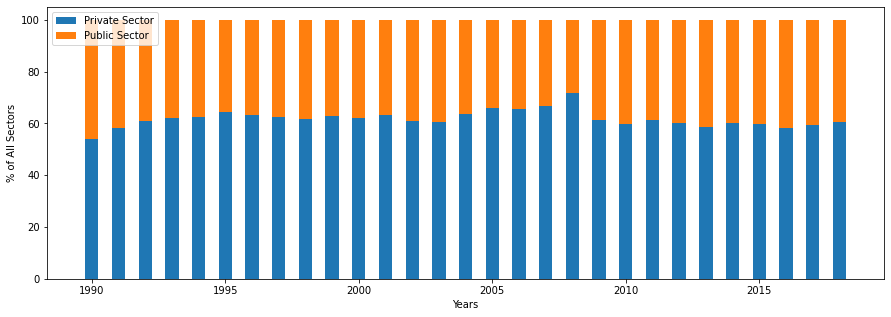

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Private,54,58,61,62,63,64,63,62,62,63,...,61,60,61,60,59,60,60,58,59,61
Public,46,42,39,38,37,36,37,38,38,37,...,39,40,39,40,41,40,40,42,41,39
All,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [57]:
dataset = np.array(table)[:,:-1]
dataset /= (dataset[2]/100)
table2 = pd.DataFrame(dataset,index=sector,columns=year)
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(year,dataset[0],0.5,label='Private Sector')
ax.bar(year,dataset[1],0.5,label='Public Sector',bottom=dataset[0])
ax.set_xlabel('Years');ax.set_ylabel('% of All Sectors');ax.legend(loc='upper left')
plt.show()
table2

> `(Stacked Bar) & Pivot`
> + Using Pivot Table, statistics shows the percentage of each sectors (**Private** & **Public**) with respect to all sectors
> + Stacked bar illustrate that dataset
> + Splitting them into Private or public sector, we noticed that Private sector is the higher % component compared to Public sector. across the last 28 years

### R&D Expenditure by Type of Cost

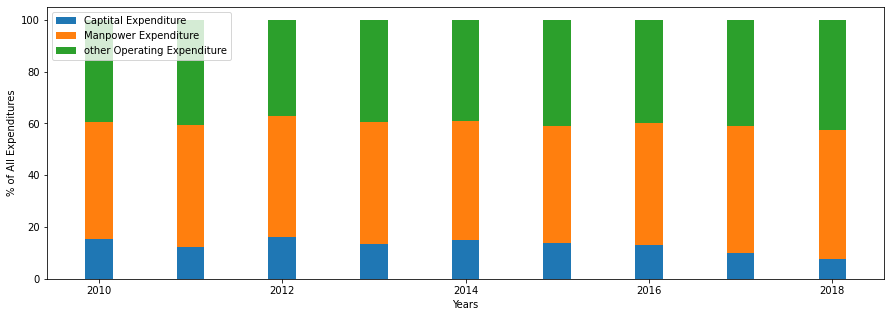

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Capital Expenditure,15,12,16,14,15,14,13,10,8
Manpower Expenditure,45,47,47,47,46,45,47,49,50
Other Operating Expenditure,39,40,37,39,39,41,40,41,43
All,100,100,100,100,100,100,100,100,100


In [58]:
df = pd.read_csv('ca2_data/research-and-development-expenditure-by-type-of-cost.csv',sep=',')
table = pd.pivot_table(data=df,columns='year',index='type_of_expenditure',values='rnd_expenditure',margins=True,aggfunc='sum')
dataset = np.array(table)[:,:-1]
dataset /= (dataset[3]/100)
table1 = pd.DataFrame(dataset,columns=year[-9:],index=type_of_expenditure)
fig,ax = plt.subplots(figsize=(15,5))
ax.bar(year[-9:],dataset[0],0.3,label='Captital Expenditure')
ax.bar(year[-9:],dataset[1],0.3,label='Manpower Expenditure',bottom=dataset[0])
ax.bar(year[-9:],dataset[2],0.3,label='other Operating Expenditure',bottom=dataset[0]+dataset[1])
ax.set_xlabel('Years');ax.set_ylabel('% of All Expenditures');ax.legend(loc='upper left')
plt.show()
table1

> `(Stacked Bar) & Pivot`
> + It is noted that total expenditure comprises of captial, manpower and other operating expenditure
> + Using Pivot Table, statistics shows the percentage of each expenditure (**Captial** & **Manpower** & **Other Operating**) with respect to all expenditure
> + Stacked bar illustrate that dataset
> + The highest percentage component that makes up of total expenditure is manpower expenditure, ranging from 45% to 50% based on the following data, followed by other operating expenditure and least amongst al is capital expenditure.

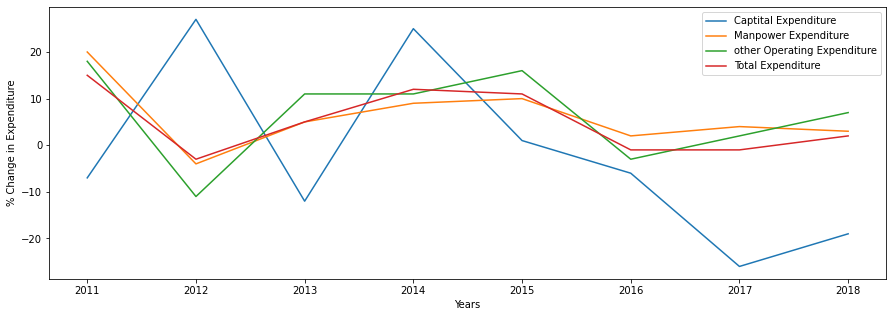

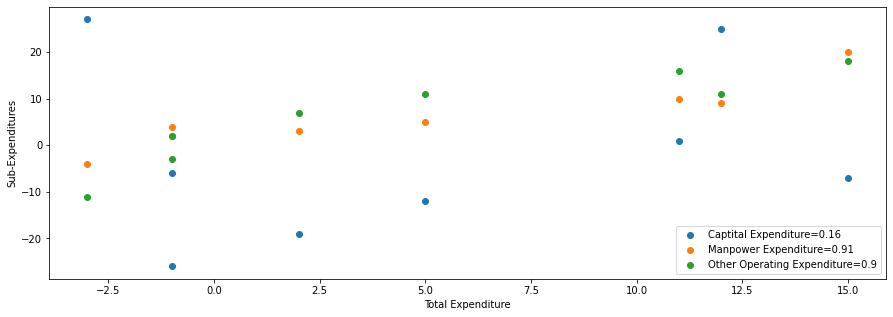

,2011,2012,2013,2014,2015,2016,2017,2018
Capital Expenditure,-7,27,-12,25,1,-6,-26,-19
Manpower Expenditure,20,-4,5,9,10,2,4,3
Other Operating Expenditure,18,-11,11,11,16,-3,2,7
All,15,-3,5,12,11,-1,-1,2


In [59]:
dataset = np.array(table)[:,:-1]
for i in range(4):
  for j in range(8):
    dataset[i][j] = ((dataset[i][j+1]-dataset[i][j])/dataset[i][j]*100).round()
table1 = pd.DataFrame(dataset[:,:-1],columns=year[-8:],index=type_of_expenditure)
dataset = np.array(table1)
fig,ax = plt.subplots(figsize=(15,5))
ax.plot(year[-8:],dataset[0],label='Captital Expenditure')
ax.plot(year[-8:],dataset[1],label='Manpower Expenditure')
ax.plot(year[-8:],dataset[2],label='other Operating Expenditure')
ax.plot(year[-8:],dataset[3],label='Total Expenditure')
ax.set_xlabel('Years');ax.set_ylabel('% Change in Expenditure');ax.legend()
plt.show()
fig,ax = plt.subplots(figsize=(15,5))
ax.scatter(dataset[3],dataset[0],label=f'Captital Expenditure={(np.corrcoef(dataset[3],dataset[0])[0,1]).round(2)}')
ax.scatter(dataset[3],dataset[1],label=f'Manpower Expenditure={(np.corrcoef(dataset[3],dataset[1])[0,1]).round(2)}')
ax.scatter(dataset[3],dataset[2],label=f'Other Operating Expenditure={(np.corrcoef(dataset[3],dataset[2])[0,1]).round(2)}')
ax.set_xlabel('Total Expenditure');ax.set_ylabel('Sub-Expenditures');ax.legend()
plt.show()
table1

> `(Line, Scatter) & Pivot`
> + Using Pivot Table, statistics shows the percentage change of each expenditure over the years
> + Line graph illustrates that dataset
>   + Captital = 0.16, manpower = 0.91, other operating = 0.9
>   + Capital has a poor correlation with total expenditure as capitcal is a fixed cost
>   + However, Manpower and other operating expenditure have good correlations with total expenditure, total expenditure fluctuations are heavily reliant on the fluctuations of manpower and other operating expenditure.

> + Scatter graph shows the correlation between each expenditure with respect to total expenditure
>   + It shows that there is a weak correlation between total expenditure and capitcal expenditure, while manpower and other operating expenditure has an almost perfect correlation with total expenditure
>   + Increase in total R&D expenditure means increase in job opportunities and hence manpower cost increase. Same goes for other operating cost, eg of operating cost is like indirect cost on non capital materials, rental or any other fees used to support th R&D activities. More R&D activities, more other operating cost incurred and a requirement to hire more manpower to perform the R&D activities, and this trend can be seen in graph where total manpower and other operating cost increase when total R&D expenditure increase

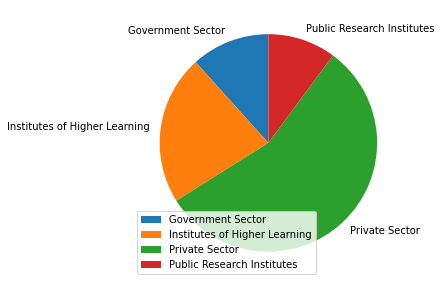

,2018
Government Sector,12
Institutes of Higher Learning,22
Private Sector,56
Public Research Institutes,10
All,100


In [60]:
table = pd.pivot_table(data=df[(df['year']==2018)&(df['type_of_expenditure']=='Manpower Expenditure')],columns='year',index='sector',values='rnd_expenditure',margins=True,aggfunc='sum')
dataset = np.array(table)[:,:-1]
dataset /= (dataset[4]/100)
table1 = pd.DataFrame(dataset,columns=['2018'],index=sector2)
fig,ax = plt.subplots(figsize=(15,5))
ax.pie(dataset[:-1].flatten(),labels=sector2[:-1],startangle=90)
ax.legend(loc='lower left')
plt.show()
table1

> `(Pie) & Pivot`
> + Since the previous graph shows that manpower cost is the leading factor that contribute to total expenditure, we look further into manpower expenditure's sectors
> + Using Pivote Table, statistics shows the percentage of all sectors on **2018** and **Manpower** as type of expenditure
> + Pie chart illustrate that dataset
> + **Private sector** in __sector__ has the highest percentage in **Manpower** in __type of expenditure__, followed by Institutes of Higher Learning.

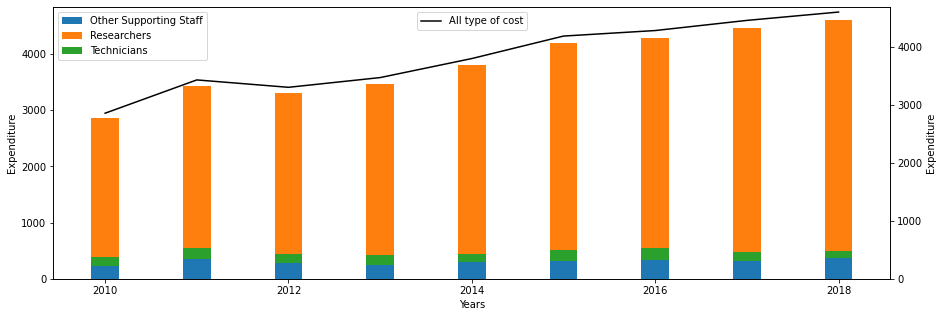

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
type_of_cost,,,,,,,,,,
Other Supporting Staff,227,349,278,253,292,321,343,324,363,2749
Researchers,2463,2888,2869,3057,3360,3686,3747,3981,4107,30158
Technicians,170,198,160,165,152,185,197,157,137,1523
All,2860,3435,3307,3475,3804,4192,4288,4463,4607,34430


In [61]:
table = pd.pivot_table(data=df[df['type_of_expenditure']=='Manpower Expenditure'],columns='year',index='type_of_cost',values='rnd_expenditure',margins=True,aggfunc='sum')
dataset = np.array(table)[:,:-1]
fig,ax = plt.subplots(figsize=(15,5));secax = ax.twinx()
ax.bar(year[-9:],dataset[0],0.3,label='Other Supporting Staff')
ax.bar(year[-9:],dataset[1],0.3,label='Researchers',bottom=dataset[0]+dataset[2])
ax.bar(year[-9:],dataset[2],0.3,label='Technicians',bottom=dataset[0])
secax.plot(year[-9:],dataset[3],color='black',label='All type of cost')
ax.set_xlabel('Years');ax.set_ylabel('Expenditure');secax.set_ylabel('Expenditure');ax.legend(loc='upper left');secax.legend(loc='upper center');secax.set_ylim(ymin=0)
plt.show()
table

> `(Line & Stacked Bar) & Pivot`
> + For type of cost, these will be assumed to be researches:
>   + Land, Buildings & Other Structures
>   + Vehicles, Plant, Machinery & Equipment
>   + Researchers
>   + Other Operating Costs
> + From that, there would be 3 components under manpower expenditure, (Researches, Other supporting staffs and technicians)
> + Using Pivot Table, statistics shows the all type of costs with **Manpower** as type of expenditure over the years
> + The line graph shows that the main component of the type of cost in manpower cost is researches, there also seem to have a positive correlation with total expenditure. The other 2 type of costs seem to be constant throughtout the years. 
> + This in line with more researchers are needed to be involve in more activities and more R&D activities are reflected by higher expenditure which is represented by the upward trend line of the total expenditure

### R&D Manpower Full Time Equivalence by Sector

In [62]:
df = pd.read_csv('ca2_data/research-and-development-manpower-full-time-equivalence-by-sector.csv',sep=',')
table = pd.pivot_table(data=df,columns='year',index='sector',values='fte',margins=True,aggfunc='sum')
dataset = np.row_stack((np.array(table)[2],np.array(table)[0]+np.array(table)[1]+np.array(table)[3],np.array(table)[0]+np.array(table)[1]+np.array(table)[2]+np.array(table)[3]))[:,:-1]
table1 = pd.DataFrame(dataset,columns=year[-9:],index=sector)
table1

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Private,19166,20404,20200,21335,21638,23044,22387,22228,23136
Public,17844,18586,19246,20232,20883,22410,22709,22288,21681
All,37010,38990,39446,41567,42522,45454,45096,44515,44816


> `Pivot`

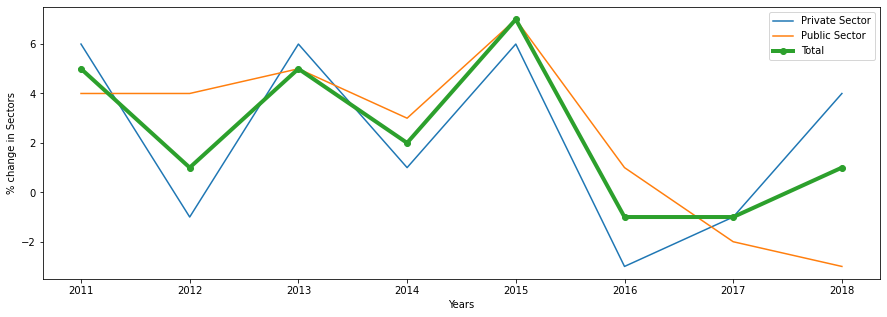

,2011,2012,2013,2014,2015,2016,2017,2018
Private,6,-1,6,1,6,-3,-1,4
Public,4,4,5,3,7,1,-2,-3
All,5,1,5,2,7,-1,-1,1


In [63]:
for i in range(3):
  for j in range(8):
    dataset[i][j] = ((dataset[i][j+1]-dataset[i][j])/dataset[i][j]*100).round()
table1 = pd.DataFrame(dataset[:,:-1],columns=year[-8:],index=sector)
dataset = np.array(table1)
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(year[-8:],dataset[0],label='Private Sector')
ax.plot(year[-8:],dataset[1],label='Public Sector')
ax.plot(year[-8:],dataset[2],'-o',label='Total',linewidth=4)
ax.set_xlabel('Years');ax.set_ylabel('% change in Sectors');ax.legend()
plt.show()
table1

> `(Line) & Pivot`
> + From the line graph, it's observed that percentage change in private sector has a more evident impact on manpower expenditure as compared to public sector.
> + With the gradients of private sector line and manpower line being very correlated, as compared to public sector, it supports the statemenet previously.

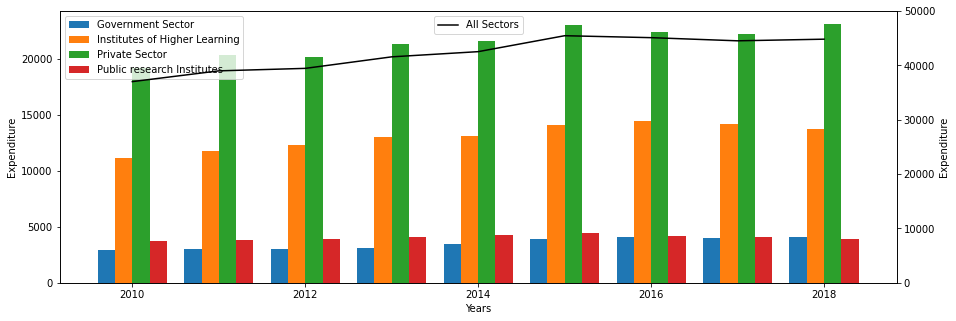

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
sector,,,,,,,,,,
Government Sector,2967,3039,3003,3146,3497,3879,4076,4009,4072,31687
Institutes of Higher Learning,11133,11737,12295,13000,13104,14084,14421,14173,13734,117680
Private Sector,19166,20404,20200,21335,21638,23044,22387,22228,23136,193537
Public Research Institutes,3744,3811,3948,4086,4283,4447,4213,4105,3875,36512
All,37010,38990,39446,41567,42522,45454,45096,44515,44816,379416


In [64]:
dataset = np.array(table)[:,:-1]
fig, ax = plt.subplots(figsize=(15, 5));secax = ax.twinx()
ax.bar(year[-9:]-0.3,dataset[0],0.2,label='Government Sector')
ax.bar(year[-9:]-0.1,dataset[1],0.2,label='Institutes of Higher Learning')
ax.bar(year[-9:]+0.1,dataset[2],0.2,label='Private Sector')
ax.bar(year[-9:]+0.3,dataset[3],0.2,label='Public research Institutes')
secax.plot(year[-9:],dataset[4],color='black',label='All Sectors')
secax.set_ylim(ymin=0, ymax=50000)
ax.set_xlabel('Years');ax.set_ylabel('Expenditure');secax.set_ylabel('Expenditure');ax.legend(loc='upper left');secax.legend(loc='upper center')
plt.show()
table

> `(Line, Bar) & Pivot`
> + Regardless of the type of cost in the total manpower, it's noticable that private sector and one of the public sector arm, Institutes of Higher Learning has a higher percentage manpower expenditure as compared to the rest of the public sector.

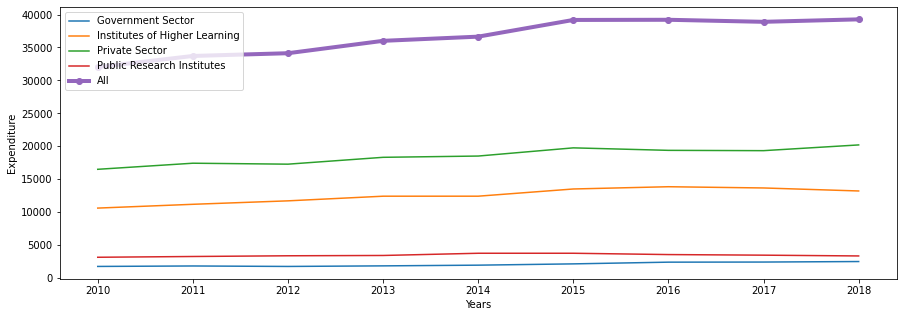

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
sector,,,,,,,,,,
Government Sector,1757,1827,1756,1844,1950,2146,2407,2423,2501,18610
Institutes of Higher Learning,10616,11191,11716,12421,12423,13517,13859,13672,13215,112630
Private Sector,16505,17430,17285,18326,18518,19761,19383,19336,20207,166749
Public Research Institutes,3150,3266,3376,3422,3757,3758,3558,3468,3350,31105
All,32028,33714,34132,36012,36648,39182,39208,38898,39272,329094


In [65]:
table = pd.pivot_table(data=df[(df['type_of_rnd_manpower'] != 'Other Supporting Staff') & (df['type_of_rnd_manpower'] != 'Technicians')], columns='year', index='sector', values='fte', margins=True, aggfunc='sum')
dataset = np.array(table)[:, :-1]
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(year[-9:], dataset[0], label='Government Sector')
ax.plot(year[-9:], dataset[1], label='Institutes of Higher Learning')
ax.plot(year[-9:], dataset[2], label='Private Sector')
ax.plot(year[-9:], dataset[3], label='Public Research Institutes')
ax.plot(year[-9:], dataset[4], '-o', label='All', linewidth=4)
ax.set_xlabel('Years')
ax.set_ylabel('Expenditure')
ax.legend(loc='upper left')
plt.show()
table

> `(Line) & Pivot`
> + Narrowing into research category, its also shown the main contributor to the total manpower cost are the private sector follow by the instutes of higher learning 
> + This is in line with earlier graphs that total overall manpower cost is mainly contributed by the research

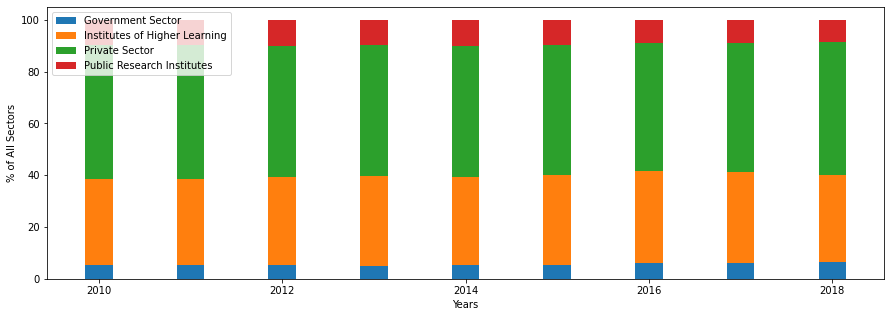

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Government Sector,5,5,5,5,5,5,6,6,6
Institutes of Higher Learning,33,33,34,34,34,34,35,35,34
Private Sector,52,52,51,51,51,50,49,50,51
Public Research Institutes,10,10,10,10,10,10,9,9,9
All,100,100,100,100,100,100,100,100,100


In [66]:
dataset /= (dataset[4] / 100)
table1 = pd.DataFrame(dataset, columns=year[-9:], index=sector2)
fig, ax = plt.subplots(figsize=(15, 5))
rec = [
    ax.bar(year[-9:], dataset[0], 0.3, label='Government Sector'),
    ax.bar(year[-9:], dataset[1], 0.3, label='Institutes of Higher Learning', bottom=dataset[0]),
    ax.bar(year[-9:], dataset[2], 0.3, label='Private Sector', bottom=dataset[0]+dataset[1]),
    ax.bar(year[-9:], dataset[3], 0.3, label='Public Research Institutes', bottom=dataset[0]+dataset[1]+dataset[2])]
ax.set_xlabel('Years')
ax.set_ylabel('% of All Sectors')
ax.legend(loc='upper left')
plt.show()
table1

> `(Stacked Bar) & Pivot`
> + The stack bar group shows Private sector and institutes of higher learning already make up of more than 80% of the manpower expenditure with researches as type of cost
> + Private sector comprises of all business enterprises, excluding institutions of higher learning, whereas Institutes of Higher Learning comprises of  universities and polytechnics.

In [67]:
table = pd.pivot_table(data=df[((df['type_of_rnd_manpower'] != 'Other Supporting Staff') & (df['type_of_rnd_manpower'] != 'Technicians')) & ((df['sector'] == 'Institutes of Higher Learning') | (df['sector'] == 'Private Sector'))], columns='year', index='type_of_rnd_manpower', values='fte', margins=True, aggfunc='sum')
table

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
type_of_rnd_manpower,,,,,,,,,,
Bachelors,11064,11535,11357,12035,12176,13174,13166,13361,13928,111795
Masters,4664,5126,5346,5722,5919,6367,6388,6319,6362,52213
Non Degree,2018,2082,1954,1952,1718,1964,1682,1667,1725,16761
PhD,3615,3888,4420,5026,5327,5912,6272,6294,6452,47206
Post Graduate,5760,5990,5924,6012,5800,5862,5734,5367,4955,51404
All,27121,28621,29001,30747,30940,33278,33242,33008,33422,279379


> `Pivot`

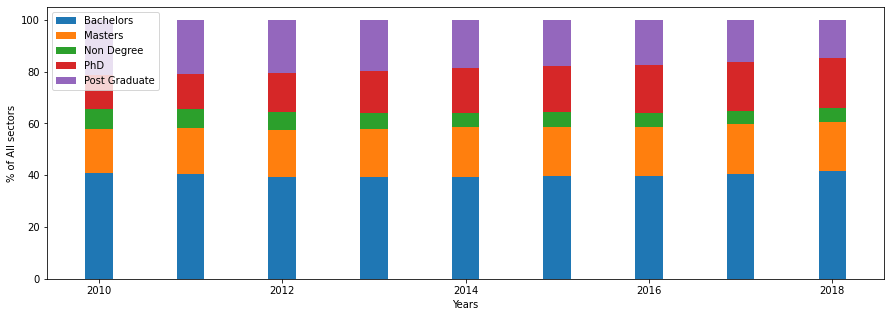

,2010,2011,2012,2013,2014,2015,2016,2017,2018
Bachelors,41,40,39,39,39,40,40,40,42
Masters,17,18,18,19,19,19,19,19,19
Non Degree,7,7,7,6,6,6,5,5,5
PhD,13,14,15,16,17,18,19,19,19
Post Graduate,21,21,20,20,19,18,17,16,15
All,100,100,100,100,100,100,100,100,100


In [68]:
dataset = np.array(table)[:, :-1]
dataset /= (dataset[5] / 100)
table1 = pd.DataFrame(dataset, columns=year[-9:], index=type_of_rnd_manpower)
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(year[-9:], dataset[0], 0.3, label='Bachelors')
ax.bar(year[-9:], dataset[1], 0.3, label='Masters', bottom=dataset[0])
ax.bar(year[-9:], dataset[2], 0.3, label='Non Degree', bottom=dataset[0]+dataset[1])
ax.bar(year[-9:], dataset[3], 0.3, label='PhD', bottom=dataset[0]+dataset[1]+dataset[2])
ax.bar(year[-9:], dataset[4], 0.3, label='Post Graduate', bottom=dataset[0]+dataset[1]+dataset[2]+dataset[3])
ax.set_xlabel('Years')
ax.set_ylabel('% of All sectors')
ax.legend(loc='upper left')
plt.show()
table1

> `(Stacked Bar) & Pivot`
> + There are 5 type of R&D manpower in the research category
> + This stack column graph shows the combination of the 2 highest sectors, private and higher learning, which contribute the most to the manpower cost in terms of researchers category
> + Out of which the bachelors are the highest ratio among the 5 type of R&D manpower, followed by Masters
> + However, PHD are increasing comparing to the master and bachelors across the years

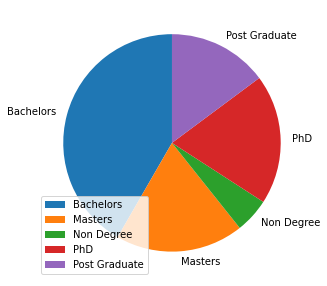

,2018
Bachelors,42
Masters,19
Non Degree,5
PhD,19
Post Graduate,15


In [69]:
fig, ax = plt.subplots(figsize=(15, 5))
table1 = pd.DataFrame(dataset[:, -1][:-1], columns=[2018], index=type_of_rnd_manpower[:-1])
ax.pie(dataset[:, -1][:-1], labels=('Bachelors', 'Masters', 'Non Degree', 'PhD', 'Post Graduate'), startangle=90)
ax.legend(loc='lower left')
plt.show()
table1

> `(Pie) & Pivot`
> + Earlier graphs where private and higher learning sector are the most sector that are contributing to the manpower cost amongst all other sectors.
> + This pie is showing the same year 2018 where we drill into further with research being the most among the 3 type of cost that contribute to the manpower cost.
> + we break by the type of R&D manpower in terms of research cateory with private and higher learning combine together as they are the top 2 sectors that are contributing the most to the manpower cost.
> + It's observe that bacherlors,  masters and PHD are the most hired in the private and higher learning that make up of more than 50% of the total manpower research category
> + As the trend across years is also showing bachelors, master and PHD are the top 3 that make up of the total manpower cost within research category in the private and higher learning sectors.
> + Year 2018 is also a good representation for the ratios and from here it demonstrated that the demands for PHD research employment is increasing over the years where they require more profound staffs with better qualifications to perform the R&D activities

### Conclusion

> + From the 1st graph where it shows that the R&D total expenditure is on an upward liner trend based on the 10 years series gap, 
> + However, if we break it into year on year comparison, it is noted that there is up and down year on year but overall its an upward trend
> + The R&D total expenditure is moving in line with the economy Gross Domestic Product (GDP) where it represent the economy condition
> + Further break into what cause the R&D total expenditure to increase and what are the variants that contributed to the movement
> + We noticed that in the 2000s where the great recession of the financial crisis caused a spike down in year 2008 and 2009, eventually it started to climb up to an upward trend and the most significant cut during that period is the private sector.
> + And further drill into what are the variant that are co related with the total expenditure is the manpower and other operating cost.
> + Increase in total R&D expenditure means improvement to the economy GDP and hence there will be an employment opportunity as the public or private sectors need to hire in order to perform the R&D activities
> + from the graphs it seems like the sectors that contribute most to the total R&D expenditure are Private like privatised business enterprises and Institute of Higher learning which comprises of universities and polytechnics.
> + Based on the stats, the type of R&D manpower that are the main contributor to the total manpower cost are research out of the 3 categories which are research, technician and other supporting staffs
> + The linear line for research across years is positive corelated to the total manpower R&D cost
> + Filtering the top 2 sectors that contribute to the manpower cost, which are private and institutes of higher learning, and research category which contribute most to the manpower cost, we sieve out that the demand for PHD is increasing thought the main component of the manpower cost is bachelors
> + This concludes that across time, more demand on a higher knowledge and education are required for the R&D activities but bachelors are the most demand currently based on the statistic from 2010 to 2018, as bachelors are still the highest ratio amongst all the type of R&D manpower. Also manpower is positive co related to R&D total expenditure. When R&D is an investment by companies or public sector to improve and with more innovative methodology to further improve existing process, and its an along side positive corelated with GDP, PHD has an increasing demand and bachelors is the minimal education that one must have in order to be involve in the R&D activities.
> + PhD as type of cost in expenditure is the main factor to the increase in R&D Expenditure, while Bachelors as type of cost in expenditure is the factor to the high value of R&D Expenditure.  